Завдання 1. Завантажити Diabetes Dataset
Цей датасет містить 10 фізіологічних змінних (вік, стать, індекс маси
тіла, артеріальний тиск та інші) та одну цільову змінну, яка представляє
прогрес діабету через рік після вихідних даних.
Провести попередній аналіз даних:
1. Вивести перших 5 рядків.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


2. Перевірити наявність пропусків. У разі виявлення замінити на
середнє значення.

In [2]:
print("\nЧи є пропуски?", df.isnull().sum().sum())


Чи є пропуски? 0


3. Перевірити наявність дублікатів, при виявленні – видалити.

In [3]:
duplicates = df.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()


Кількість дублікатів: 0


4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте
унікальні значення.

In [4]:
print("\nУнікальні значення у стовпчику 'sex':", df['sex'].unique())
df['sex'] = df['sex'].apply(lambda x: 1 if x > 0 else 0)


Унікальні значення у стовпчику 'sex': [ 0.05068012 -0.04464164]


5. Перевірити тип даних. При необхідності замінити тип даних на
числовий.

In [5]:
print("\nТипи даних:\n", df.dtypes)


Типи даних:
 age       float64
sex         int64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
Розташувати в порядку спадання.
Побудувати теплову карту кореляції.


Кореляція з прогресом діабету:
 target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


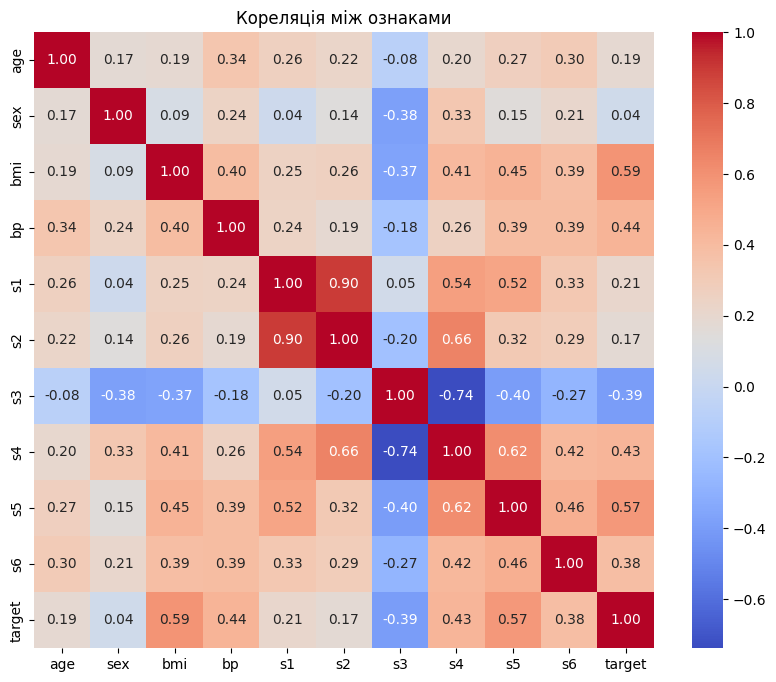

In [6]:
corr = df.corr()['target'].sort_values(ascending=False)
print("\nКореляція з прогресом діабету:\n", corr)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Кореляція між ознаками")
plt.show()

7. Масштабувати ознаки

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

8. Поділити дані на тренувальну і тестову вибірки.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)

9. Побудувати модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак (підібрати оптимальне число).

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.

In [10]:
print("\nЛінійна регресія R^2:", r2_score(y_test, y_pred_lr))
print("Лінійна регресія MSE:", mean_squared_error(y_test, y_pred_lr))

print("\nRandomForest R^2:", r2_score(y_test, y_pred_rf))
print("RandomForest MSE:", mean_squared_error(y_test, y_pred_rf))


Лінійна регресія R^2: 0.4526027629719195
Лінійна регресія MSE: 2900.1936284934814

RandomForest R^2: 0.44074575666493343
RandomForest MSE: 2963.013847191012


11. Побудувати графіки

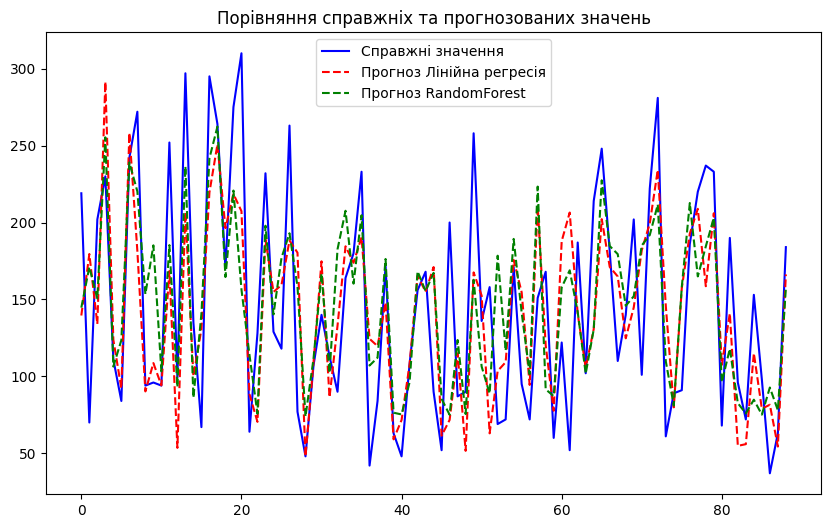

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Справжні значення', color='blue')
plt.plot(y_pred_lr, label='Прогноз Лінійна регресія', color='red', linestyle='dashed')
plt.plot(y_pred_rf, label='Прогноз RandomForest', color='green', linestyle='dashed')
plt.legend()
plt.title("Порівняння справжніх та прогнозованих значень")
plt.show()

12. Вивести справжні і прогнозовані значення.

In [12]:
df_results = pd.DataFrame({
    'Справжні значення': y_test.values,
    'Прогноз Лінійна регресія': y_pred_lr,
    'Прогноз RandomForest': y_pred_rf
})
print("\nСправжні і прогнозовані значення:\n", df_results.head())


Справжні і прогнозовані значення:
    Справжні значення  Прогноз Лінійна регресія  Прогноз RandomForest
0              219.0                139.547558                144.66
1               70.0                179.517208                171.05
2              202.0                134.038756                150.62
3              230.0                291.417029                255.36
4              111.0                123.789659                106.39


Висновок: під час виконання лабораторної роботи, я навчився працювати з Diabetes Dataset, та керувати данними.

Завдання 2.
Завантажити датасет California Housing Dataset, що містить інформацію
про житло в Каліфорнії. Вивести перших 5 рядків.
1. Провести попередній аналіз даних за схемою (дивиться вище)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Чи є пропуски? 0

Кількість дублікатів: 0

Типи даних:
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Кореляція з ціною будинку:
 MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151

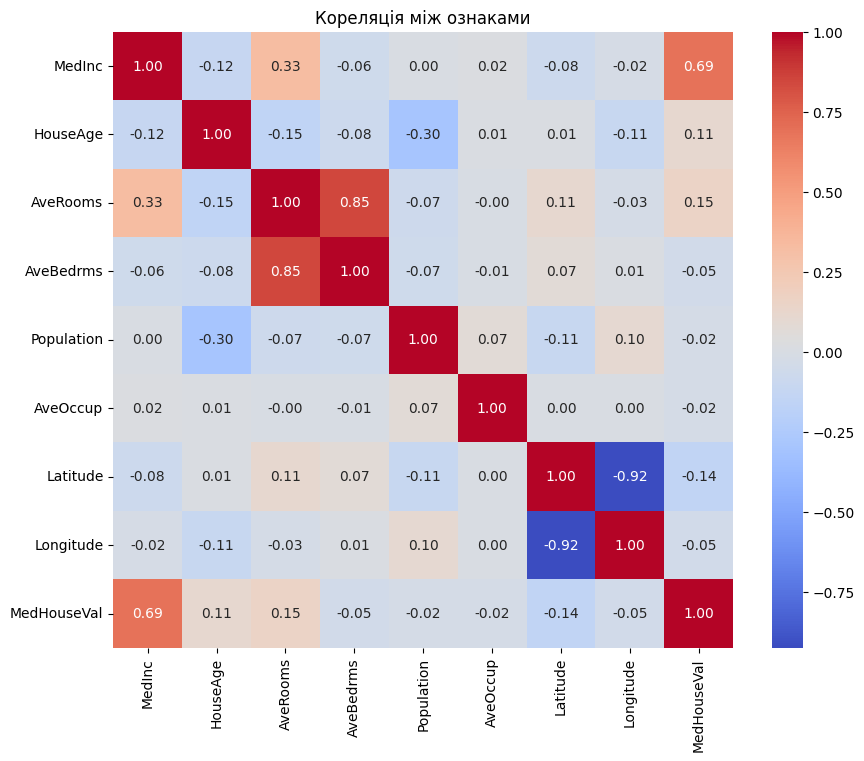

In [15]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df_housing = housing.frame

print(df_housing.head())

print("\nЧи є пропуски?", df_housing.isnull().sum().sum())
df_housing.fillna(df_housing.mean(), inplace=True)

duplicates = df_housing.duplicated().sum()
print(f"\nКількість дублікатів: {duplicates}")
if duplicates > 0:
    df_housing = df_housing.drop_duplicates()

print("\nТипи даних:\n", df_housing.dtypes)

corr_housing = df_housing.corr()['MedHouseVal'].sort_values(ascending=False)
print("\nКореляція з ціною будинку:\n", corr_housing)

plt.figure(figsize=(10, 8))
sns.heatmap(df_housing.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Кореляція між ознаками")
plt.show()

2. Масштабувати ознаки.

In [14]:
X_housing_scaled = scaler.fit_transform(df_housing.drop('MedHouseVal', axis=1))

3. Поділити дані на тренувальні і тестові.

In [16]:
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing_scaled, df_housing['MedHouseVal'], test_size=0.2, random_state=42)

4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
Підібрати оптимальні параметри за допомогою GridSeach.


LinearRegression R^2: 0.5757877060324511
LinearRegression MSE: 0.555891598695244


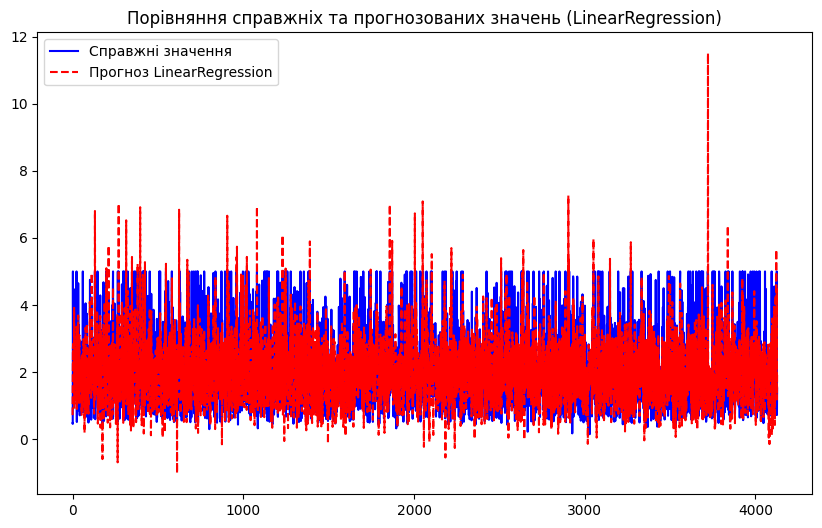

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge()
}

params = {
    'LinearRegression': {},
    'RandomForest': {'n_estimators': [50, 100, 200]},
    'Ridge': {'alpha': [0.1, 1, 10, 100]}
}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, params[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_housing, y_train_housing)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_housing)

    print(f"\n{model_name} R^2:", r2_score(y_test_housing, y_pred))
    print(f"{model_name} MSE:", mean_squared_error(y_test_housing, y_pred))

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_housing.values, label='Справжні значення', color='blue')
    plt.plot(y_pred, label=f'Прогноз {model_name}', color='red', linestyle='dashed')
    plt.legend()
    plt.title(f"Порівняння справжніх та прогнозованих значень ({model_name})")
    plt.show()

Висновок: Висновки: Моделі, побудовані на основі лінійної регресії, регресії випадкового лісу та Ridge, продемонстрували різні результати точності.